In [85]:
import numpy as np
import pandas as pd
from scipy import stats as scs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
population = np.random.normal(15,0.5,100)
sample = np.random.choice(population,16)
sample

array([14.70709198, 15.15549253, 15.15549253, 15.29302481, 13.84773041,
       15.58273385, 15.79771855, 15.06604052, 14.69173065, 14.97903023,
       15.06469218, 15.14574245, 14.48033354, 15.45790643, 15.14574245,
       15.19176167])

In [19]:
x_bar = sample.mean()
s = sample.std()
t_value = (x_bar-population.mean())/(s/np.sqrt(len(sample)))
t_value

0.3532996670499442

In [20]:
scs.ttest_1samp(sample,popmean = population.mean())

Ttest_1sampResult(statistic=0.3420809316762648, pvalue=0.7370357843989355)

(array([ 7.,  6.,  8., 14., 23., 18., 13.,  5.,  1.,  5.]),
 array([-1.69783337, -1.33388775, -0.96994212, -0.6059965 , -0.24205087,
         0.12189475,  0.48584037,  0.849786  ,  1.21373162,  1.57767725,
         1.94162287]),
 <BarContainer object of 10 artists>)

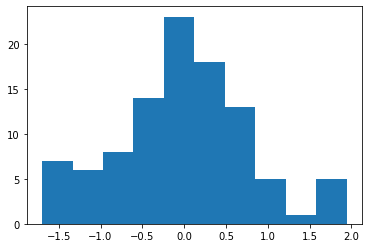

In [29]:
prediction = np.random.normal(15,0.7,100)
model_preds = pd.DataFrame({'Population':population,'Prediction':prediction})
model_preds['Error'] = model_preds.Population - model_preds.Prediction
plt.hist(model_preds.Error,10)

In [31]:
MSE = np.square(model_preds.Error).mean()
MSE

0.6188736858826764

In [32]:
iris = pd.read_csv('Iris/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [88]:
Setosa = iris[iris['Species']=='Iris-setosa'].describe()
Setosa = Setosa.T
Setosa['mean'][1:]

SepalLengthCm    5.006
SepalWidthCm     3.418
PetalLengthCm    1.464
PetalWidthCm     0.244
Name: mean, dtype: float64

<BarContainer object of 4 artists>

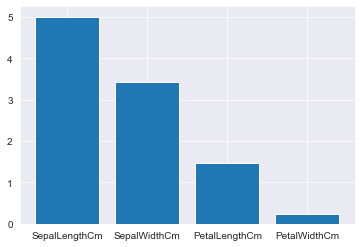

In [89]:
plt.bar(Setosa.index[1:],Setosa['mean'][1:])

In [109]:
iris_mean = iris.groupby('Species').mean().drop('Id', axis = 1)
iris_mean = iris_mean.unstack().reset_index()
iris_mean.columns = ['Attribute','Species', 'Average']
iris_mean

,Attribute,Species,Average
0,SepalLengthCm,Iris-setosa,5.006
1,SepalLengthCm,Iris-versicolor,5.936
2,SepalLengthCm,Iris-virginica,6.588
3,SepalWidthCm,Iris-setosa,3.418
4,SepalWidthCm,Iris-versicolor,2.770
5,SepalWidthCm,Iris-virginica,2.974
6,PetalLengthCm,Iris-setosa,1.464
7,PetalLengthCm,Iris-versicolor,4.260
8,PetalLengthCm,Iris-virginica,5.552
9,PetalWidthCm,Iris-setosa,0.244


<AxesSubplot:xlabel='Attribute', ylabel='Average'>

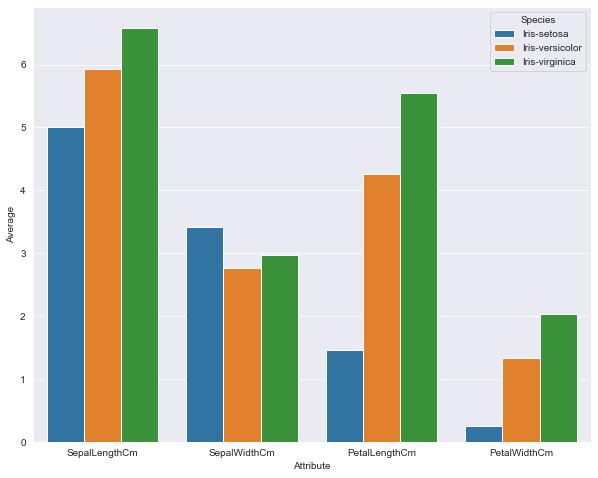

In [111]:
plt.figure(figsize = (10,8))
sns.barplot(y = iris_mean['Average'], x = iris_mean['Attribute'], hue = iris_mean['Species'])